# OSCILADOR DE RELAJACION
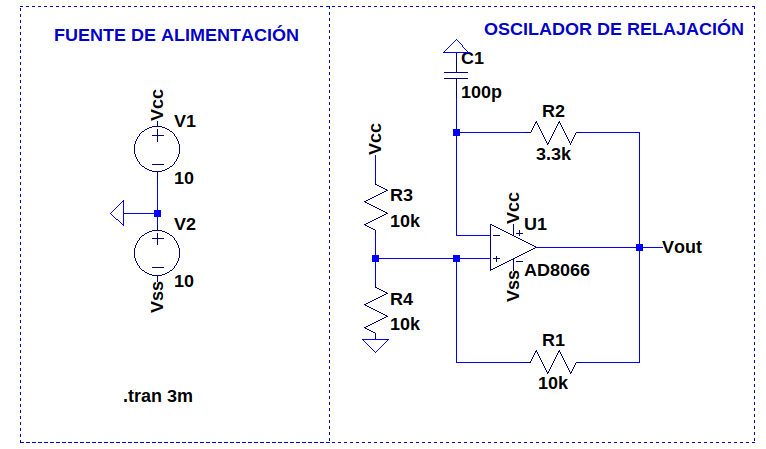


Index(['time', 'V(vout)', 'V(n001)'], dtype='object')


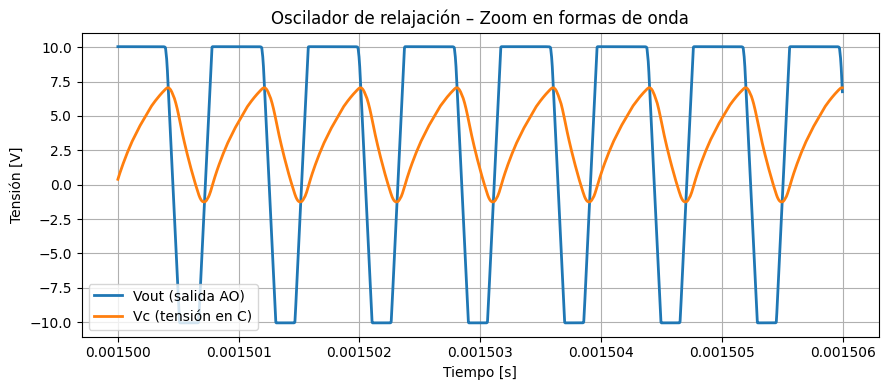

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo exportado de LTspice (separado por tabulaciones)
df = pd.read_csv("relax_Osc_ad8066.txt", sep="\t")
df.columns = df.columns.str.strip()  # limpiar nombres

print(df.columns)  # para verificar cómo LTspice llamó a cada columna

t   = df["time"]
vout = df["V(vout)"]   # ajustá el nombre según lo que muestre el print
vc   = df["V(n001)"]     # idem

t_min = 1.5e-3   # 1.5 ms
t_max = 1.506e-3 # 1.502 ms (unas pocas oscilaciones)


# Filtra la porción de interés
mask = (t >= t_min) & (t <= t_max)

t_zoom = t[mask]
vout_zoom = vout[mask]
vc_zoom = vc[mask]

# Graficar
plt.figure(figsize=(9,4))
plt.plot(t_zoom, vout_zoom, label="Vout (salida AO)", linewidth=2)
plt.plot(t_zoom, vc_zoom, label="Vc (tensión en C)", linewidth=2)

plt.title("Oscilador de relajación – Zoom en formas de onda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer datos
df = pd.read_csv("relax_Osc_ad8066.txt", sep="\t")
df.columns = df.columns.str.strip()

t    = df["time"].to_numpy()
vout = df["V(vout)"].to_numpy()
vc   = df["V(n001)"].to_numpy()

# 2) Estimar frecuencia a partir de flancos de subida de Vout
v_high = vout.max()
v_low  = vout.min()
umbral = (v_high + v_low) / 2.0

# condición: cruce de umbral con pendiente positiva
idx = np.where((vout[1:] >= umbral) & (vout[:-1] < umbral))[0] + 1
t_flancos = t[idx]

# Para evitar transitorios iniciales, descartamos los primeros flancos si hace falta
if len(t_flancos) > 5:
    t_use = t_flancos[2:]  # por ejemplo, a partir del 3er flanco
else:
    t_use = t_flancos

if len(t_use) >= 2:
    T_medios = np.diff(t_use)
    T_prom = T_medios.mean()
    f_med = 1.0 / T_prom
    print(f"Período medio ≈ {T_prom*1e9:.2f} ns")
    print(f"Frecuencia medida ≈ {f_med/1e6:.2f} MHz")
else:
    print("No se detectaron suficientes flancos para medir frecuencia.")


Período medio ≈ 797.20 ns
Frecuencia medida ≈ 1.25 MHz


## Ahora con un LM324

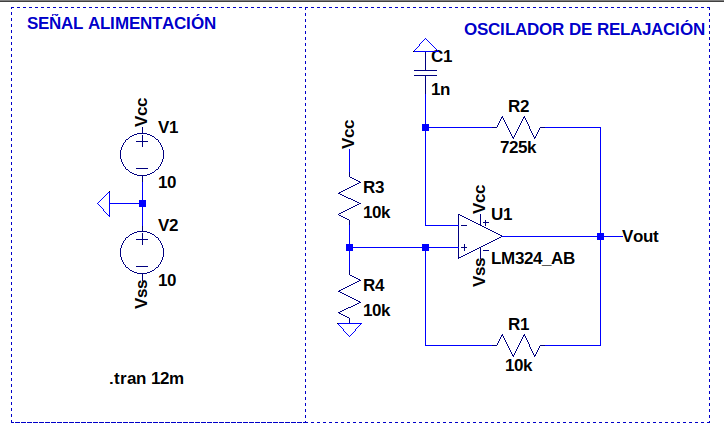

### Buscaremos una frecuencia de oscilacion cercana a 1kHz que es lo que el dispositivo puede manejar bien.

Index(['time', 'V(vout)', 'V(n001)'], dtype='object')


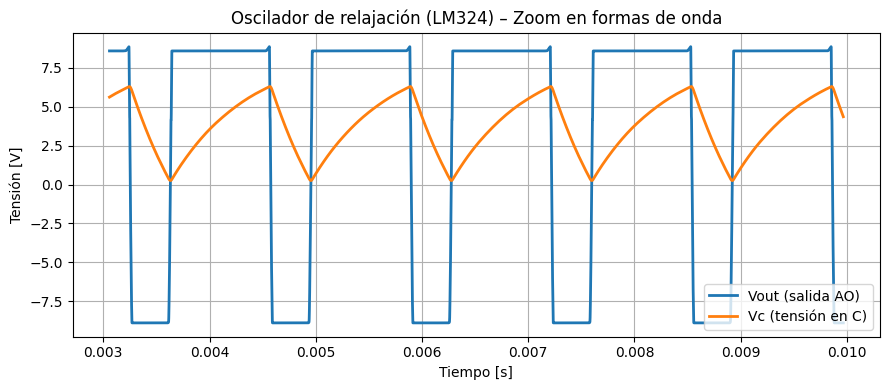

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo exportado de LTspice (separado por tabulaciones)
df = pd.read_csv("relax_Osc_lm324.txt", sep="\t")
df.columns = df.columns.str.strip()  # limpiar nombres

print(df.columns)  # para verificar cómo LTspice llamó a cada columna

t   = df["time"]
vout = df["V(vout)"]   # ajustá el nombre según lo que muestre el print
vc   = df["V(n001)"]     # idem

t_min = 3e-3   #  ms
t_max = 10e-3 # 10 ms 


# Filtra la porción de interés
mask = (t >= t_min) & (t <= t_max)

t_zoom = t[mask]
vout_zoom = vout[mask]
vc_zoom = vc[mask]

# Graficar
plt.figure(figsize=(9,4))
plt.plot(t_zoom, vout_zoom, label="Vout (salida AO)", linewidth=2)
plt.plot(t_zoom, vc_zoom, label="Vc (tensión en C)", linewidth=2)

plt.title("Oscilador de relajación (LM324) – Zoom en formas de onda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer datos
df = pd.read_csv("relax_Osc_lm324.txt", sep="\t")
df.columns = df.columns.str.strip()

t    = df["time"].to_numpy()
vout = df["V(vout)"].to_numpy()
vc   = df["V(n001)"].to_numpy()

# 2) Estimar frecuencia a partir de flancos de subida de Vout
v_high = vout.max()
v_low  = vout.min()
umbral = (v_high + v_low) / 2.0

# condición: cruce de umbral con pendiente positiva
idx = np.where((vout[1:] >= umbral) & (vout[:-1] < umbral))[0] + 1
t_flancos = t[idx]

# Para evitar transitorios iniciales, descartamos los primeros flancos si hace falta
if len(t_flancos) > 5:
    t_use = t_flancos[2:]  # por ejemplo, a partir del 3er flanco
else:
    t_use = t_flancos



if len(t_use) >= 2:
    T_medios = np.diff(t_use)
    T_prom = T_medios.mean()
    f_med = 1.0 / T_prom

    print(f"Período medio ≈ {T_prom*1e6:.2f} µs")

    if f_med >= 1e6:
        print(f"Frecuencia ≈ {f_med/1e6:.3f} MHz")
    elif f_med >= 1e3:
        print(f"Frecuencia ≈ {f_med/1e3:.3f} kHz")
    else:
        print(f"Frecuencia ≈ {f_med:.3f} Hz")
else:
    print("No se detectaron suficientes flancos.")

Período medio ≈ 1322.13 µs
Frecuencia ≈ 756.356 Hz
